<a href="https://colab.research.google.com/github/KiranAI887/Breast-Cancer-Detection/blob/main/Project10_Breast_cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv("breast_cancer_data.csv")

In [ ]:
df.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong


In [ ]:
df.dtypes

patient_id                 int64
clump_thickness          float64
cell_size_uniformity     float64
cell_shape_uniformity      int64
marginal_adhesion          int64
single_ep_cell_size        int64
bare_nuclei               object
bland_chromatin          float64
normal_nucleoli          float64
mitoses                    int64
class                     object
doctor_name               object
dtype: object

In [ ]:
df.describe

<bound method NDFrame.describe of      patient_id  clump_thickness  cell_size_uniformity  cell_shape_uniformity  \
0       1000025              5.0                   1.0                      1   
1       1002945              5.0                   4.0                      4   
2       1015425              3.0                   1.0                      1   
3       1016277              6.0                   8.0                      8   
4       1017023              4.0                   1.0                      1   
..          ...              ...                   ...                    ...   
694      776715              3.0                   1.0                      1   
695      841769              2.0                   1.0                      1   
696      888820              5.0                  10.0                     10   
697      897471              4.0                   8.0                      6   
698      897471              4.0                   8.0                     

In [ ]:
df.shape

(699, 12)

In [ ]:
df.isna().sum()

patient_id               0
clump_thickness          1
cell_size_uniformity     1
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              2
bland_chromatin          4
normal_nucleoli          1
mitoses                  0
class                    0
doctor_name              0
dtype: int64

In [ ]:
#Data Wrangling/Pre-processing/Feature Engineering is done before implementing ML algorithm .
# Deal with missing values
#   Drop entire column if missing values are too high
#   Use fillna.mean for numuerical values and fillna.mode for categorical values
# Deal with Duplicate Values
# Converting data from categorical to numerical

In [ ]:
df[df['bare_nuclei'].str.isnumeric() == False]

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
23,1057013,8.0,4.0,5,1,2,?,7.0,3.0,1,malignant,Dr. Smith
40,1096800,6.0,6.0,6,9,6,?,7.0,8.0,1,benign,Dr. Wong
139,1183246,1.0,1.0,1,1,1,?,2.0,1.0,1,benign,Dr. Lee
145,1184840,1.0,1.0,3,1,2,?,2.0,1.0,1,benign,Dr. Wong
158,1193683,1.0,1.0,2,1,3,?,1.0,1.0,1,benign,Dr. Doe
164,1197510,5.0,1.0,1,1,2,?,3.0,1.0,1,benign,Dr. Smith
235,1241232,3.0,1.0,4,1,2,?,3.0,1.0,1,benign,Dr. Doe
249,169356,3.0,1.0,1,1,2,?,3.0,1.0,1,benign,Dr. Wong
275,432809,3.0,1.0,3,1,2,?,2.0,1.0,1,benign,Dr. Lee
292,563649,8.0,8.0,8,1,2,?,6.0,10.0,1,malignant,Dr. Wong


In [ ]:
import numpy as np

In [ ]:
df = df.replace('?',np.nan)

In [ ]:
df.isna().sum()

patient_id                0
clump_thickness           1
cell_size_uniformity      1
cell_shape_uniformity     0
marginal_adhesion         0
single_ep_cell_size       0
bare_nuclei              18
bland_chromatin           4
normal_nucleoli           1
mitoses                   0
class                     0
doctor_name               0
dtype: int64

In [ ]:
df['clump_thickness']=df['clump_thickness'].fillna(df['clump_thickness'].mean())

In [ ]:
df['cell_size_uniformity']=df['cell_size_uniformity'].fillna(df['cell_size_uniformity'].mean())

In [ ]:
df['bland_chromatin']=df['bland_chromatin'].fillna(df['bland_chromatin'].mean())

In [ ]:
df['normal_nucleoli']=df['normal_nucleoli'].fillna(df['normal_nucleoli'].mean())

In [ ]:
df.isna().sum()

patient_id                0
clump_thickness           0
cell_size_uniformity      0
cell_shape_uniformity     0
marginal_adhesion         0
single_ep_cell_size       0
bare_nuclei              18
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
doctor_name               0
dtype: int64

In [ ]:
df['bare_nuclei'] = df ['bare_nuclei'].astype(float)

In [ ]:
df['bare_nuclei']=df['bare_nuclei'].fillna(df['bare_nuclei'].mean())

In [ ]:
df.isna().sum()

patient_id               0
clump_thickness          0
cell_size_uniformity     0
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
doctor_name              0
dtype: int64

In [ ]:
df.nunique()

patient_id               645
clump_thickness           11
cell_size_uniformity      11
cell_shape_uniformity     10
marginal_adhesion         10
single_ep_cell_size       10
bare_nuclei               11
bland_chromatin           11
normal_nucleoli           11
mitoses                    9
class                      2
doctor_name                4
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(698, 12)

In [ ]:
df.isna().sum()

patient_id               0
clump_thickness          0
cell_size_uniformity     0
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
doctor_name              0
dtype: int64

In [ ]:
df['doctor_name'].value_counts()

Dr. Doe      185
Dr. Lee      180
Dr. Smith    176
Dr. Wong     157
Name: doctor_name, dtype: int64

To deal with categorical variables (Object),


1.   Correct the datatype if its wrong (check for junk values)
2.   Logical categorical converison like benign/malignant, not spam/spam, can be replaced by 0 or 1
3. Label Encoding-Transforms categorical to numerical by numbering alphabetically. You can use Label encoder from sklearn library.
4. One-hot encoding overcomes the weight bias of label encoding by making column out of each unique value of the categorical column. One-hot encoding can be done via pandas getdummy function and sklearns -onehotencoding function



In [ ]:
one_hot_encoded_data=pd.get_dummies(df, columns = ['doctor_name'])

In [ ]:
print(one_hot_encoded_data)

     patient_id  clump_thickness  cell_size_uniformity  cell_shape_uniformity  \
0       1000025              5.0                   1.0                      1   
1       1002945              5.0                   4.0                      4   
2       1015425              3.0                   1.0                      1   
3       1016277              6.0                   8.0                      8   
4       1017023              4.0                   1.0                      1   
..          ...              ...                   ...                    ...   
694      776715              3.0                   1.0                      1   
695      841769              2.0                   1.0                      1   
696      888820              5.0                  10.0                     10   
697      897471              4.0                   8.0                      6   
698      897471              4.0                   8.0                      8   

     marginal_adhesion  sin

In [ ]:
br = one_hot_encoded_data

In [ ]:
br['class'].replace(['benign','malignant'],
 [0, 1], inplace=True)

In [ ]:
br.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name_Dr. Doe,doctor_name_Dr. Lee,doctor_name_Dr. Smith,doctor_name_Dr. Wong
0,1000025,5.0,1.0,1,1,2,1.0,3.0,1.0,1,0,1,0,0,0
1,1002945,5.0,4.0,4,5,7,10.0,3.0,2.0,1,0,0,0,1,0
2,1015425,3.0,1.0,1,1,2,2.0,3.0,1.0,1,0,0,1,0,0
3,1016277,6.0,8.0,8,1,3,4.0,3.0,7.0,1,0,0,0,1,0
4,1017023,4.0,1.0,1,3,2,1.0,3.0,1.0,1,0,0,0,0,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(br)

<Axes: >

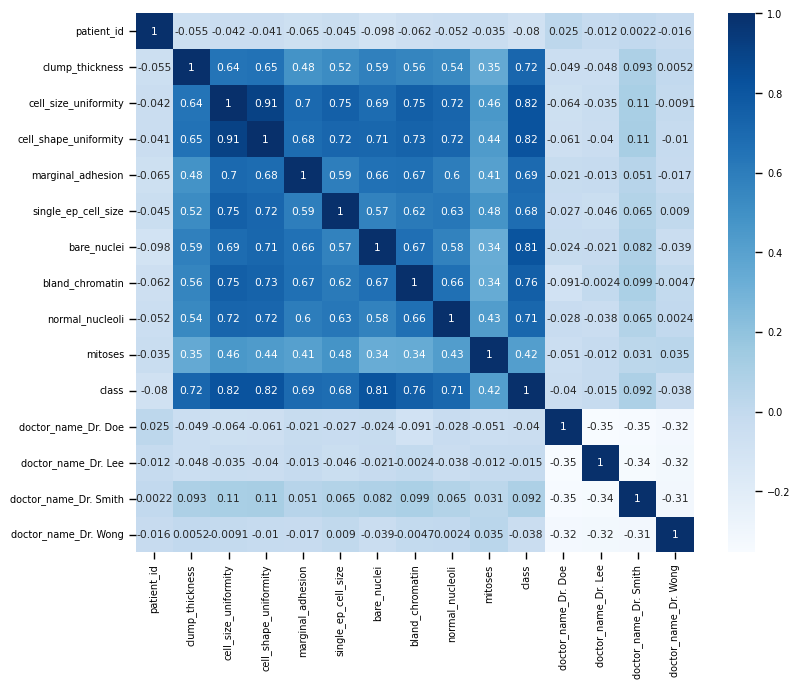

In [ ]:
plt.figure(figsize=(9,7))
sns.set_context('paper',font_scale=0.8)

corr_matrix=br.corr()
sns.heatmap(corr_matrix,annot=True,cmap='Blues')


In [ ]:
corr_matrix

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name_Dr. Doe,doctor_name_Dr. Lee,doctor_name_Dr. Smith,doctor_name_Dr. Wong
patient_id,1.000000,-0.055159,-0.041514,-0.041374,-0.064792,-0.045377,-0.098103,-0.061629,-0.052051,-0.034803,-0.080044,0.024766,-0.011549,0.002229,-0.016397
clump_thickness,-0.055159,1.000000,0.643791,0.654472,0.482440,0.521806,0.585158,0.556123,0.535511,0.349992,0.715491,-0.049009,-0.048171,0.093386,0.005152
cell_size_uniformity,-0.041514,0.643791,1.000000,0.906386,0.702296,0.751387,0.687340,0.754575,0.722094,0.458364,0.817330,-0.063736,-0.034698,0.108470,-0.009085
cell_shape_uniformity,-0.041374,0.654472,0.906386,1.000000,0.683072,0.719524,0.709848,0.734711,0.719011,0.438756,0.818794,-0.061148,-0.039585,0.112094,-0.010470
marginal_adhesion,-0.064792,0.482440,0.702296,0.683072,1.000000,0.594227,0.657242,0.665615,0.602335,0.412895,0.693350,-0.020972,-0.013113,0.050846,-0.016973
single_ep_cell_size,-0.045377,0.521806,0.751387,0.719524,0.594227,1.000000,0.573691,0.615087,0.628700,0.478975,0.682618,-0.026813,-0.046151,0.065085,0.009006
bare_nuclei,-0.098103,0.585158,0.687340,0.709848,0.657242,0.573691,1.000000,0.669651,0.576636,0.336991,0.813826,-0.024185,-0.020523,0.082453,-0.038685
bland_chromatin,-0.061629,0.556123,0.754575,0.734711,0.665615,0.615087,0.669651,1.000000,0.664752,0.343641,0.755684,-0.090692,-0.002378,0.099120,-0.004730
normal_nucleoli,-0.052051,0.535511,0.722094,0.719011,0.602335,0.628700,0.576636,0.664752,1.000000,0.428070,0.711813,-0.027766,-0.038360,0.064551,0.002407
mitoses,-0.034803,0.349992,0.458364,0.438756,0.412895,0.478975,0.336991,0.343641,0.428070,1.000000,0.423008,-0.051480,-0.011928,0.031001,0.034673


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X=br[['cell_size_uniformity','cell_shape_uniformity','marginal_adhesion','bare_nuclei','bland_chromatin']]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data

In [ ]:
vif_data["VIF"]=[variance_inflation_factor(X.values,i)
                           for i in range(len(X.columns))]

In [ ]:
print(vif_data)

                 feature        VIF
0   cell_size_uniformity  13.084277
1  cell_shape_uniformity  13.268517
2      marginal_adhesion   4.580020
3            bare_nuclei   4.716820
4        bland_chromatin   6.241479


In [ ]:
import statsmodels.api as sm

In [ ]:
def model_summary(x,y):
  xtr=sm.add_constant(np.array(br[x]))
  model=sm.OLS(np.array(br[y]),xtr).fit()
  print(model.summary())

In [ ]:
model_summary(['cell_size_uniformity','cell_shape_uniformity','marginal_adhesion','bare_nuclei','bland_chromatin'],'class')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     579.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.89e-244
Time:                        08:01:54   Log-Likelihood:                 102.83
No. Observations:                 698   AIC:                            -193.7
Df Residuals:                     692   BIC:                            -166.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1710      0.014    -12.341      0.0

In [ ]:
model_summary(['cell_shape_uniformity'],'class')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     1416.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          6.54e-170
Time:                        08:04:52   Log-Likelihood:                -84.099
No. Observations:                 698   AIC:                             172.2
Df Residuals:                     696   BIC:                             181.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0755      0.015     -4.954      0.0

In [ ]:
model_summary(['cell_size_uniformity'],'class')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1401.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          8.14e-169
Time:                        08:04:18   Log-Likelihood:                -86.626
No. Observations:                 698   AIC:                             177.3
Df Residuals:                     696   BIC:                             186.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0550      0.015     -3.687      0.0

In [ ]:
X = br[['cell_shape_uniformity','marginal_adhesion','bare_nuclei','bland_chromatin']]
y = br['class']

In [ ]:
X

,cell_size_uniformity,marginal_adhesion,bare_nuclei,bland_chromatin
0,1.0,1,1.0,3.0
1,4.0,5,10.0,3.0
2,1.0,1,2.0,3.0
3,8.0,1,4.0,3.0
4,1.0,3,1.0,3.0
...,...,...,...,...
694,1.0,1,2.0,1.0
695,1.0,1,1.0,1.0
696,10.0,3,3.0,8.0
697,8.0,4,4.0,10.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = logr.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test,predictions)
print(accuracy)

0.9333333333333333


In [ ]:

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       132
           1       0.93      0.88      0.91        78

    accuracy                           0.93       210
   macro avg       0.93      0.92      0.93       210
weighted avg       0.93      0.93      0.93       210

